# Домашна задача 3
## Моделирање и симулација 2018/2019
### Андреј Јанчевски - 151003

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

### Генерирање на секвенци од стохастичкиот модел за пораст на популација преку методот на Ојлер и Марујама
$$
dN=rN(1-\frac{N}{K})dt + \alpha N dW \\
N_{t+1}=N_{t}+rN_{t}(1-\frac{N_{t}}{K})\Delta t + \alpha N_{t}\Delta W_{t}\\
\Delta W_{t} \sim \mathcal{N}(0,\Delta t)
$$

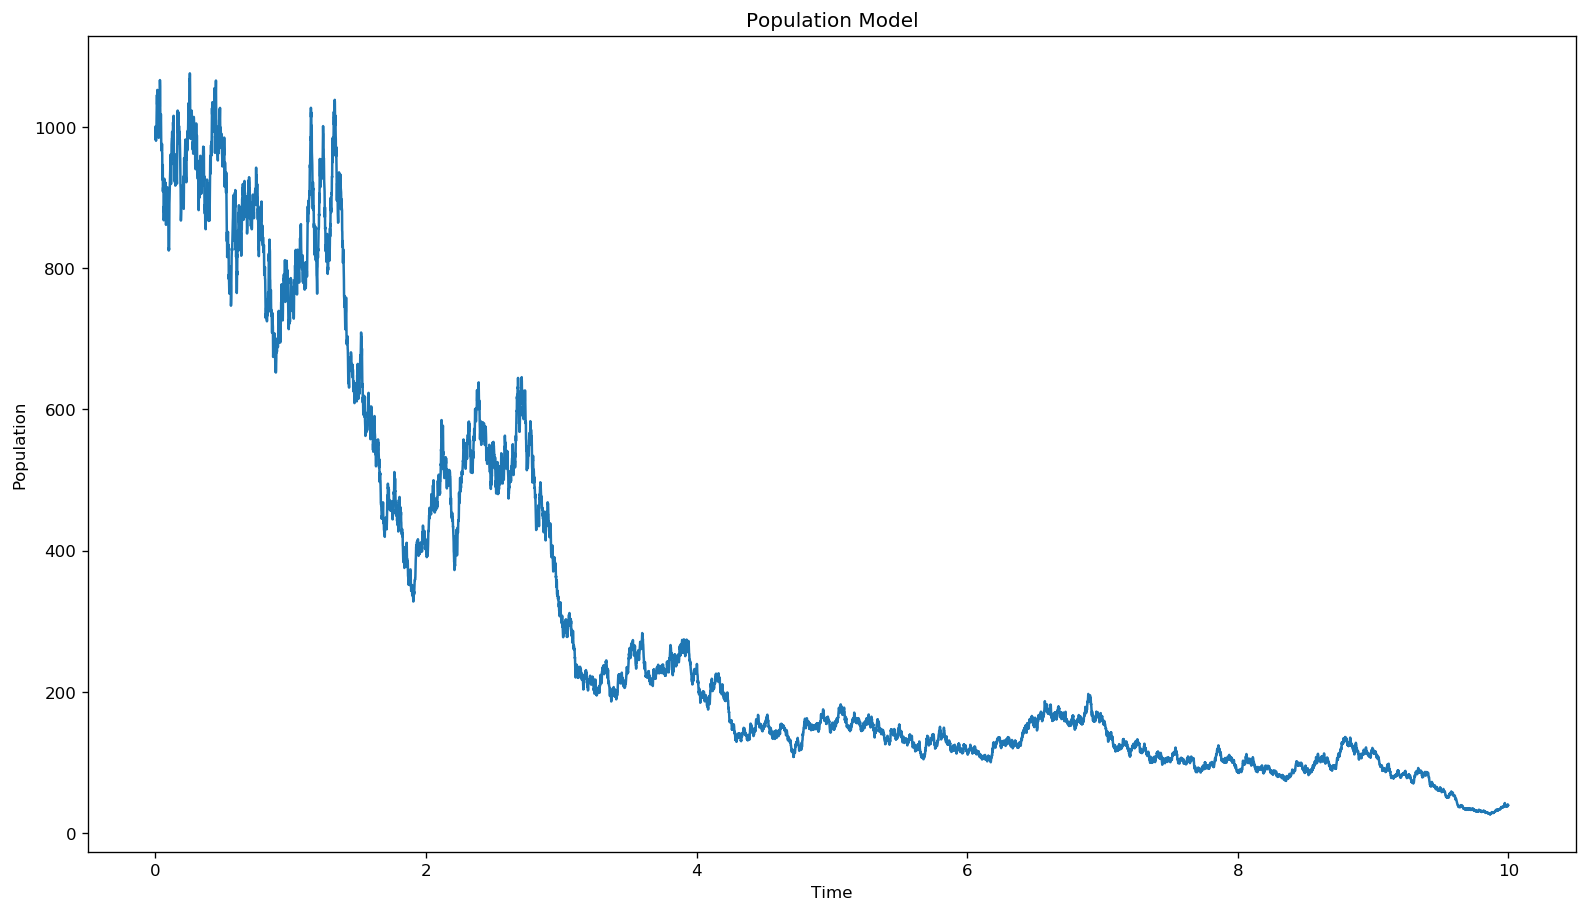

In [2]:
def get_population_sequence(length, initial, time_step, r, k, alpha):
    population = np.zeros(length)
    population[0] = initial
    times = np.zeros(length)
    for t in range(1, length):
        times[t] = t * time_step
        previous = population[t - 1]
        population[t] = previous + r * previous * (
            1 - previous / k) * time_step + alpha * previous * random.gauss(
                0, np.sqrt(time_step))
    return times, population


times, population = get_population_sequence(
    length=10000, initial=1000, time_step=0.001, r=0.01, k=10, alpha=0.5)
plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
plt.title("Population Model")
plt.plot(times, population)
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

### Апроксимирање на вистинската средна вредност на моделот преку извршување 10000 симулации

In [3]:
num_simulations = 10000
population_length = 10000
samples = np.zeros(num_simulations)
for i in range(0, num_simulations):
    _, population = get_population_sequence(
        length=population_length,
        initial=1000,
        time_step=0.001,
        r=0.01,
        k=10,
        alpha=0.5)
    samples[i] = population[population_length - 1]
true_average = np.average(samples)
print("True Average: " + str(true_average))

True Average: 62.07774207504623


### Споредба на средната вредност на конечен ансамбл со вистинската средна вредност

In [4]:
ansamble_lengths = (10, 100, 1000)
tries = 10
for ansamble_length in ansamble_lengths:
    samples_tries = np.zeros(tries)
    for i in range(0, tries):
        samples = np.zeros(ansamble_length)
        for j in range(0, ansamble_length):
            _, population = get_population_sequence(
                length=population_length,
                initial=1000,
                time_step=0.001,
                r=0.01,
                k=10,
                alpha=0.5)
            samples[j] = population[population_length - 1]
        samples_tries[i] = np.average(samples)
    average_finite_ansamble = np.average(samples_tries)
    print("Difference between average of ansamble with length " +
          str(ansamble_length) + " and true average: " +
          str(abs(average_finite_ansamble - true_average)))

Difference between average of ansamble with length 10 and true average: 13.699441346030355
Difference between average of ansamble with length 100 and true average: 3.5796581151228253
Difference between average of ansamble with length 1000 and true average: 1.5890382058669914


### Анализа на варијансата на конечен ансамбл со текот на времето

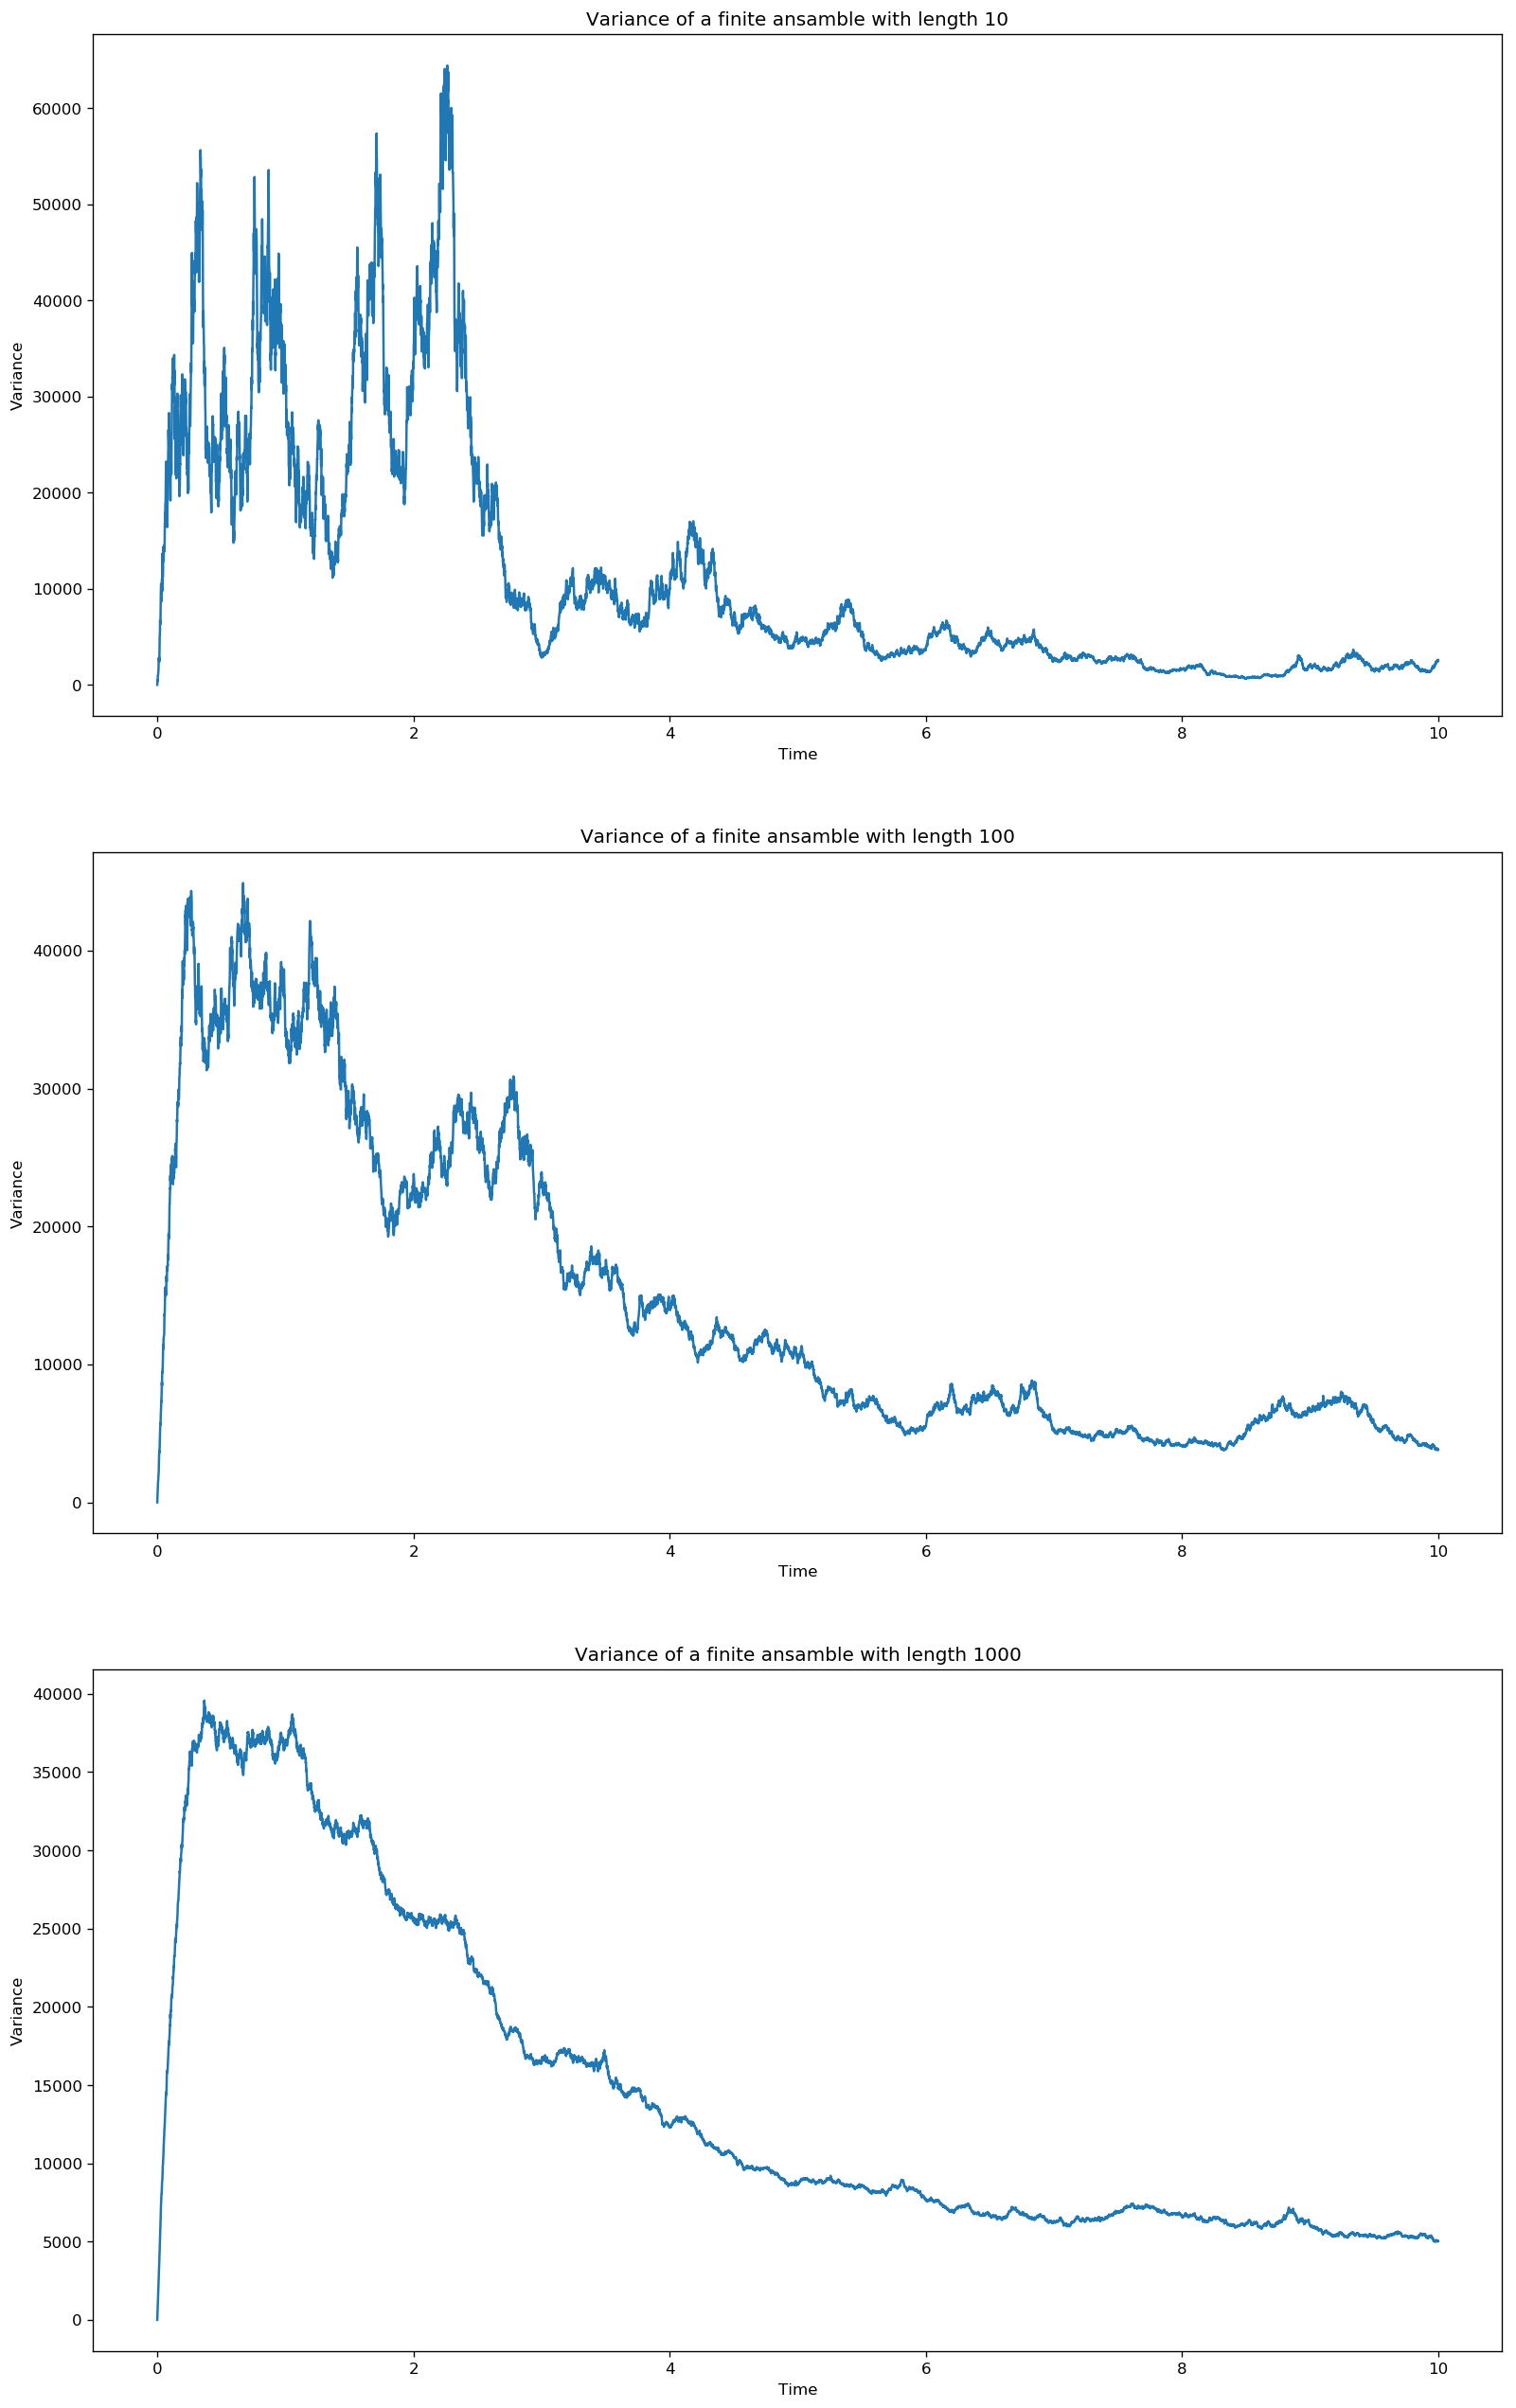

In [5]:
num_ansamble_lengths = len(ansamble_lengths)
plt.figure(2, figsize=(16, num_ansamble_lengths * 9), dpi=1920 / 16)
for i in range(0, num_ansamble_lengths):
    ansamble_length = ansamble_lengths[i]
    samples = np.zeros((ansamble_length, population_length))
    for j in range(0, ansamble_length):
        times, population = get_population_sequence(
            length=population_length,
            initial=1000,
            time_step=0.001,
            r=0.01,
            k=10,
            alpha=0.5)
        samples[j] = population
    variance = np.var(np.array(samples), axis=0)
    ax = plt.subplot(num_ansamble_lengths, 1, i + 1)
    ax.set_title("Variance of a finite ansamble with length " +
                 str(ansamble_length))
    ax.plot(times, variance)
    plt.xlabel("Time")
    plt.ylabel("Variance")
plt.show()